<a href="https://colab.research.google.com/github/kganesh1999/5292353_CAP5610_Assignment/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt


Distance metrics function

In [104]:
def euclidian(p1, p2):
  distance = np.linalg.norm(p1-p2)
  return distance
def manhattan(p1, p2):
  distance = np.abs(p1-p2).sum()
  return distance
def cosine_similarity(p1,p2):
  distance = np.dot(p1, p2)/(np.linalg.norm(p1)*np.linalg.norm(p2))
  return 1 - distance
def jaccard_similarity(p1,p2):
    numer = 0
    denom = 0
    for i in range(len(p1)):
      numer = numer + min(p1[i],p2[i])
      denom = denom + max(p1[i],p2[i])
    similarity = numer/denom
    return 1 - similarity

In [105]:
def findClosestCentroids(ic, X,distance):
  assigned_centroid = []
  for i in X:
    d=[]
    for j in ic:
      d.append(distance(i, j))
    assigned_centroid.append(np.argmin(d))
  return assigned_centroid

In [106]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids, new_df

In [107]:
def sse(centroids,new_df):
  sse_kmeans = 0
  for i in range(len(centroids)):
    points = new_df[new_df['cluster']==i].iloc[:,:-1].values
    for j in points:
      sse_kmeans = sse_kmeans + euclidian(centroids[i],j)
  return sse_kmeans

# **Task 1**

In [108]:
arr = [['X1',3,5],['X2',3,4],['X3',2,8],['X4',2,3],
       ['X5',6,2],['X6',6,4],['X7',7,3],['X8',7,4],
       ['X9',8,5],['X10',7,6]]
df = pd.DataFrame(arr,columns=['team','Wins in 2016','Wins in 2017'])
data = np.array(df.loc[:,['Wins in 2016','Wins in 2017']])
data

array([[3, 5],
       [3, 4],
       [2, 8],
       [2, 3],
       [6, 2],
       [6, 4],
       [7, 3],
       [7, 4],
       [8, 5],
       [7, 6]])

**1. Initialize with two centroids, (4, 6) and (5, 4). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids.Second, please use K-Means to find two clusters.**

In [109]:
centroids = np.array([[4,6],[5,4]])
#Code for k-means clustering
for k in range(10):
  get_centroids = findClosestCentroids(centroids,data,manhattan)
  centroids,new_df = calc_centroids(get_centroids, data)
  if k == 0:
    print('1st iteration\n',np.array(centroids),'\n')
print('Final_centroids\n',np.array(centroids),'\n')
print('Final data\n',new_df)

1st iteration
 [[4.         6.33333333]
 [5.57142857 3.57142857]] 

Final_centroids
 [[4.         6.33333333]
 [5.57142857 3.57142857]] 

Final data
    0  1  cluster
0  3  5        0
1  3  4        1
2  2  8        0
3  2  3        1
4  6  2        1
5  6  4        1
6  7  3        1
7  7  4        1
8  8  5        1
9  7  6        0


**2. Initialize with two centroids, (4, 6) and (5, 4). Use Euclidean distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids.Second, please use K-Means to find two clusters.**

In [110]:
centroids = np.array([[4,6],[5,4]])
#Code for k-means clustering
for k in range(10):
  get_centroids = findClosestCentroids(centroids,data,euclidian)
  centroids,new_df = calc_centroids(get_centroids, data)
  if k == 0:
    print('1st iteration\n',np.array(centroids),'\n')
print('Final_centroids\n',np.array(centroids),'\n')
print('Final data\n',new_df)

1st iteration
 [[2.5   6.5  ]
 [5.75  3.875]] 

Final_centroids
 [[2.5        5.        ]
 [6.83333333 4.        ]] 

Final data
    0  1  cluster
0  3  5        0
1  3  4        0
2  2  8        0
3  2  3        0
4  6  2        1
5  6  4        1
6  7  3        1
7  7  4        1
8  8  5        1
9  7  6        1


**3. Initialize with two centroids, (3, 3) and (8, 3). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids.Second, please use K-Means to find two clusters.**

In [111]:
centroids = [[3,3],[8,3]]
#Code for k-means clustering
for k in range(10):
  get_centroids = findClosestCentroids(centroids,data,manhattan)
  centroids,new_df = calc_centroids(get_centroids, data)
  if k == 0:
    print('1st iteration\n',np.array(centroids),'\n')
print('Final_centroids\n',np.array(centroids),'\n')
print('Final data\n',new_df)

1st iteration
 [[2.5        5.        ]
 [6.83333333 4.        ]] 

Final_centroids
 [[2.5        5.        ]
 [6.83333333 4.        ]] 

Final data
    0  1  cluster
0  3  5        0
1  3  4        0
2  2  8        0
3  2  3        0
4  6  2        1
5  6  4        1
6  7  3        1
7  7  4        1
8  8  5        1
9  7  6        1


**4. Initialize with two centroids, (3, 2) and (4, 8). Use Manhattan distance as the distance metric. First, perform one iteration of the K-means algorithm and report the coordinates of the resulting centroids.Second, please use K-Means to find two clusters.**

In [112]:
centroids = [[3,2],[4,8]]
#Code for k-means clustering
for k in range(10):
  get_centroids = findClosestCentroids(centroids,data,manhattan)
  centroids,new_df = calc_centroids(get_centroids, data)
  if k == 0:
    print('1st iteration\n',np.array(centroids),'\n')
print('Final_centroids\n',np.array(centroids),'\n')
print('Final data\n',new_df)

1st iteration
 [[4.85714286 3.57142857]
 [5.66666667 6.33333333]] 

Final_centroids
 [[4.85714286 3.57142857]
 [5.66666667 6.33333333]] 

Final data
    0  1  cluster
0  3  5        0
1  3  4        0
2  2  8        1
3  2  3        0
4  6  2        0
5  6  4        0
6  7  3        0
7  7  4        0
8  8  5        1
9  7  6        1


# Task 2

In [113]:
from sklearn.datasets import load_iris
iris = load_iris()
data = iris['data']
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [114]:
iris_df.target.unique()

array([0., 1., 2.])

As there are three target variables, three centroid points are taken randomly from iris data. 

In [115]:
number_of_rows = data.shape[0]
random_indices = np.random.choice(number_of_rows, size=3, replace=False)
random_rows = data[random_indices, :]

In [116]:
random_rows

array([[5.1, 3.4, 1.5, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.1, 3. , 4.6, 1.4]])

### **Euclidian k-means**

In [117]:
centroids = random_rows
#Code for k-means clustering
start = time.time()
sse_iter = []
for k in range(15):
  get_centroids = findClosestCentroids(centroids,data,euclidian)
  centroids,new_df = calc_centroids(get_centroids, data)
  val = sse(centroids,new_df)
  sse_iter.append(val)
  if(k>0):
    if(sse_iter[k] >= sse_iter[k-1]):
      sse_iter.pop(k)
      break
elapsed_time = (time.time()-start)
print('Number of iterations :',k,'\n')
print('Final_centroids\n',np.array(centroids),'\n')
#print('Final data\n',new_df)
print('SSE\n',sse_iter,'\n')
print('Time Elapsed',elapsed_time,'\n')

Number of iterations : 3 

Final_centroids
 [[5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]] 

SSE
 [100.35953363120642, 97.32846596899458, 97.22333289839919] 

Time Elapsed 0.3043999671936035 



Accuracy check 



In [118]:
actual = iris_df.target.value_counts()
actual

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [119]:
clustered = new_df.cluster.value_counts()
clustered

2    61
0    50
1    39
Name: cluster, dtype: int64

In actual iris dataset, there are 50 data belong to each classes. Whereas in clustered data, there are eleven misclassifications between cluster 1 and 2. 


In [120]:
accuracy_euc = 139/150
accuracy_euc

0.9266666666666666

### **Cosine similarity k-means**

In [121]:
centroids = random_rows
#Code for k-means clustering
start = time.time()
sse_iter = []
for k in range(20):
  get_centroids = findClosestCentroids(centroids,data,cosine_similarity)
  centroids,new_df = calc_centroids(get_centroids, data)
  val = sse(centroids,new_df)
  sse_iter.append(val)
  if(k>0):
    if(sse_iter[k] >= sse_iter[k-1]):
      sse_iter.pop(k)
      break
elapsed_time = (time.time()-start)
print('Number of iterations :',k,'\n')
print('Final_centroids\n',np.array(centroids),'\n')
#print('Final data\n',new_df)
print('SSE\n',sse_iter,'\n')
print('Time Elapsed',elapsed_time)

Number of iterations : 6 

Final_centroids
 [[5.006      3.428      1.462      0.246     ]
 [6.53703704 2.96481481 5.49814815 1.99444444]
 [5.93913043 2.76304348 4.21086957 1.30217391]] 

SSE
 [125.61590954569276, 123.51155121888573, 116.96934558418697, 108.24011324214743, 102.75795304885419, 101.45143888001493] 

Time Elapsed 0.29172253608703613


Accuracy check

In [122]:
actual = iris_df.target.value_counts()
actual

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [123]:
clustered = new_df.cluster.value_counts()
clustered

1    54
0    50
2    46
Name: cluster, dtype: int64

In actual iris dataset, there are 50 data belong to each classes. Whereas in clustered data, there are four misclassifications between cluster 1 and 0.

In [124]:
accuracy_cos = 146/150
accuracy_cos

0.9733333333333334

### **Jaccard similarity k-means**

In [125]:
centroids = random_rows
#Code for k-means clustering
start = time.time()
sse_iter = []
for k in range(30):
  get_centroids = findClosestCentroids(centroids,data,jaccard_similarity)
  centroids,new_df = calc_centroids(get_centroids, data)
  val = sse(centroids,new_df)
  sse_iter.append(val)
  if(k>0):
    if(sse_iter[k] >= sse_iter[k-1]):
      sse_iter.pop(k)
      break
elapsed_time = (time.time()-start)
print('Number of iterations :',k,'\n')
print('Final_centroids\n',np.array(centroids),'\n')
#print('Final data\n',new_df)
print('SSE\n',sse_iter,'\n')
print('Time Elapsed',elapsed_time)

Number of iterations : 2 

Final_centroids
 [[5.006      3.428      1.462      0.246     ]
 [6.79767442 3.06046512 5.64186047 2.0255814 ]
 [5.85789474 2.72982456 4.35087719 1.4122807 ]] 

SSE
 [100.01617458065468, 97.54550330347408] 

Time Elapsed 0.10924816131591797


Accuracy check

In [126]:
actual = iris_df.target.value_counts()
actual

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [127]:
clustered = new_df.cluster.value_counts()
clustered

2    57
0    50
1    43
Name: cluster, dtype: int64

In actual iris dataset, there are 50 data belong to each classes. Whereas in clustered data, there are seven misclassifications between cluster 1 and 2.

In [129]:
accuracy_jac = 143/150
accuracy_jac

0.9533333333333334

### **Plotting SSE for 100 iterations**

Euclidian k-means

In [130]:
centroids = random_rows
#Code for k-means clustering
sse_euc = []
for k in range(100):
  get_centroids = findClosestCentroids(centroids,data,euclidian)
  centroids,new_df = calc_centroids(get_centroids, data)
  val = sse(centroids,new_df)
  sse_euc.append(val)
print('SSE Euclidian\n',sse_euc,'\n')

SSE Euclidian
 [100.35953363120642, 97.32846596899458, 97.22333289839919, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387322, 97.22486903387

In [131]:
len(sse_euc)

100

Cosine Similarity k-means

In [132]:
centroids = random_rows
#Code for k-means clustering
sse_cos = []
for k in range(100):
  get_centroids = findClosestCentroids(centroids,data,cosine_similarity)
  centroids,new_df = calc_centroids(get_centroids, data)
  val = sse(centroids,new_df)
  sse_cos.append(val)
print('SSE cosine similarity\n',sse_cos,'\n')

SSE cosine similarity
 [125.61590954569276, 123.51155121888573, 116.96934558418697, 108.24011324214743, 102.75795304885419, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.45143888001493, 101.451438880014

Jaccard similarity k-means

In [133]:
centroids = random_rows
#Code for k-means clustering
sse_jac = []
for k in range(100):
  get_centroids = findClosestCentroids(centroids,data,jaccard_similarity)
  centroids,new_df = calc_centroids(get_centroids, data)
  val = sse(centroids,new_df)
  sse_jac.append(val)
print('SSE jaccard similarity\n',sse_jac,'\n')

SSE jaccard similarity
 [100.01617458065468, 97.54550330347408, 97.75919890830676, 97.60959552594773, 97.5657341658333, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.365976856074, 97.3659768560

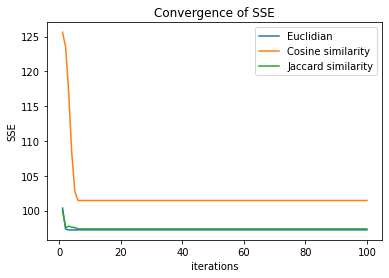

In [146]:
iter = list(np.arange(1,101))
# plotting SSE of euclidian k-means 
plt.plot(iter, sse_euc, label = "Euclidian")
# plotting SSE of cosine similarity k-means 
plt.plot(iter, sse_cos, label = "Cosine similarity")
# plotting SSE of jaccard similarity k-means 
plt.plot(iter, sse_jac, label = "Jaccard similarity")
plt.xlabel('iterations')
# Set the y axis label of the current axis.
plt.ylabel('SSE')
# Set a title of the current axes.
plt.title('Convergence of SSE')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Task 3

In [52]:
red_cluster = np.array([[4.7,3.2],[4.9,3.1],[5.0,3.0],[4.6,2.9]])
blue_cluster = np.array([[5.9,3.2],[6.7,3.1],[6.0,3.0],[6.2,2.8]])

In [53]:
red = pd.DataFrame(red_cluster, columns = ['r1','r2'])
blue = pd.DataFrame(blue_cluster, columns = ['b1','b2'])
df_t3 = pd.concat([red,blue],axis=1)
df_t3

,r1,r2,b1,b2
0,4.7,3.2,5.9,3.2
1,4.9,3.1,6.7,3.1
2,5.0,3.0,6.0,3.0
3,4.6,2.9,6.2,2.8


In [48]:
dist = []
for i in red_cluster:
  for j in blue_cluster:
    dist.append(round(euclidian(i,j),4))
print(dist)
print('index',':',np.argmax(dist),',','value',':',max(dist))
print('index',':',np.argmin(dist),',','value',':',min(dist))
print(round(np.mean(dist),4))

[1.2, 2.0025, 1.3153, 1.5524, 1.005, 1.8, 1.1045, 1.3342, 0.922, 1.7029, 1.0, 1.2166, 1.3342, 2.1095, 1.4036, 1.6031]
index : 13 , value : 2.1095
index : 8 , value : 0.922
1.4129


A. The distance between farthest points (4.6,2.9) and (6.7,3.1) is 2.1095

B. The distance between closest points (5.0,3.0) and (5.9,3.2) is 0.922

C. The average distance between all pairs is 1.4129

D. If data has noise in the form of outliers, then distance 'A' is more robust to noise.